In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [61]:
#data=pd.read_csv ("amazon_reviews_us_Mobile_Electronics_filtered.csv")
data=pd.read_csv ("gdrive/My Drive/Colab Notebooks/amazon_reviews_us_Mobile_Electronics_filtered-1.csv")
data

,star_rating,review_headline,review_body,polarity
0,5,"If you can solder, you can do it yourself!",After checking a couple of websites I realized...,2
1,4,DO NOT BUY UNLESS YOU HAVE AN SUV!!!,Do yourself a favor and measure before you buy...,2
2,5,"Phenomenal, attractive, slim case",I'm extremely picky about cases for my gadgets...,2
3,2,Case didn't protect iPod,My son dropped his iPod with this life proof c...,1
4,4,I like this case. It is a very good case.,I liked this case. It was a very good case. No...,2
...,...,...,...,...
59584,2,not pretty fit for the itouch 4,pretty feel disappoint for this product. Expen...,1
59585,4,A product that is very useful. But can use a f...,This is a great product it really fulfills a n...,2
59586,5,Impressive Sound,Very good product. Very satisfied. Clear sound...,2
59587,3,Good sound but iffy interface,"This unit sounds good, but each time I want to...",0


This dataset was taken from Amazon customer reviews data and modified in microsoft Excel for the purpose of this project. Only relevant columns were taken. A new column polarity was added which was filled according to the following
star_rating > 3  -  positive
star_rating = 3  -  neutral
star_rating < 3  -  negative


In [62]:
#removing neutral data
filtered_data= data[data.polarity != 0].reset_index()
filtered_data

,index,star_rating,review_headline,review_body,polarity
0,0,5,"If you can solder, you can do it yourself!",After checking a couple of websites I realized...,2
1,1,4,DO NOT BUY UNLESS YOU HAVE AN SUV!!!,Do yourself a favor and measure before you buy...,2
2,2,5,"Phenomenal, attractive, slim case",I'm extremely picky about cases for my gadgets...,2
3,3,2,Case didn't protect iPod,My son dropped his iPod with this life proof c...,1
4,4,4,I like this case. It is a very good case.,I liked this case. It was a very good case. No...,2
...,...,...,...,...,...
49864,59583,1,Don't buy this for your Nook!,This charger does not charge a Nook Color or N...,1
49865,59584,2,not pretty fit for the itouch 4,pretty feel disappoint for this product. Expen...,1
49866,59585,4,A product that is very useful. But can use a f...,This is a great product it really fulfills a n...,2
49867,59586,5,Impressive Sound,Very good product. Very satisfied. Clear sound...,2


we now have a dataset in which a polarity of 1 indicates negative and a polarity of 2 indicates positive

In [63]:
print(filtered_data.shape)
filtered_data['polarity'].value_counts()

(49869, 5)


2    25000
1    24869
Name: polarity, dtype: int64

In [0]:
# dividing the data into train dataset and test dataset
from sklearn.model_selection import train_test_split
Y=filtered_data['polarity']
X_train, X_test, Y_train, Y_test = train_test_split(filtered_data, Y, test_size=0.2)

In [65]:
X_train=X_train.reset_index()
X_train

,level_0,index,star_rating,review_headline,review_body,polarity
0,19047,22816,5,driver in oil fields,"Works great, exactly what I ordered, I get gre...",2
1,16047,19285,2,Low volume,No volume adjustment; returned,1
2,30216,36098,5,Holy Cow this is tough,My wife and children have NOT been kind to her...,2
3,46002,54986,5,Very Happy with the item ordered,Very happy with the product. Item was received...,2
4,37088,44322,5,Five Stars,Super fast Shipping. Good item,2
...,...,...,...,...,...,...
39890,38878,46448,5,Just as good as Apple brand,I have gone through so many lightning cables t...,2
39891,42110,50330,1,Do not waste your money,Don't waste your money on this. The Literati ...,1
39892,35334,42188,4,Product is constructed very well !,Time will tell. It is being used by a 8 yr. ol...,2
39893,15214,18298,5,Solid sound for its size,Nice for the price. Has a surprisingly solid s...,2


In [66]:
X_test=X_test.reset_index()
X_test

,level_0,index,star_rating,review_headline,review_body,polarity
0,39395,47072,5,WORTH FAR MORE THAN THE COST !,I have a 1986 BMW 635CSI sports coupe and its ...,2
1,10501,12661,5,Very nice unit,I have had my Podio for 6 months now. Still ki...,2
2,21667,25931,5,Exactly What You Want,"This is a very durable, extremely protective c...",2
3,26289,31467,5,"Soft, professional, protective",This package is a great bargain considering ho...,2
4,42019,50217,5,kidstoys,Perfect forit's such a great toys all my kids ...,2
...,...,...,...,...,...,...
9969,34678,41424,5,very good device,i bought this game on a tuesday and it arrived...,2
9970,20393,24435,1,Sucked,This case isn't worth it if you're trying to b...,1
9971,41534,49629,2,Not very impressed,This antenna arrived on time and was in good c...,1
9972,17265,20697,1,You get what you pay for,"The Radio is not a good one, I kept the speake...",1


In [67]:
#checking for null values
X_train.isnull().any()

level_0            False
index              False
star_rating        False
review_headline    False
review_body        False
polarity           False
dtype: bool

In [68]:
X_test.isnull().any()

level_0            False
index              False
star_rating        False
review_headline    False
review_body        False
polarity           False
dtype: bool

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

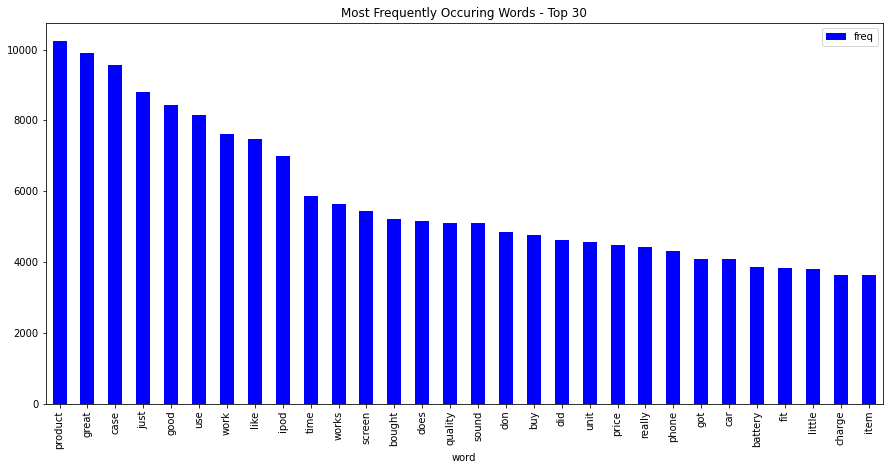

In [70]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(X_train.review_body)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [0]:
from wordcloud import WordCloud

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

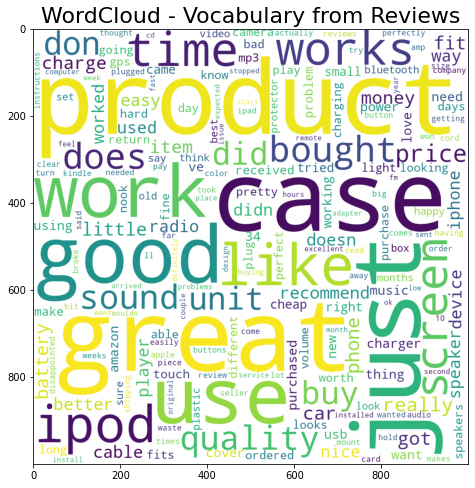

In [72]:
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

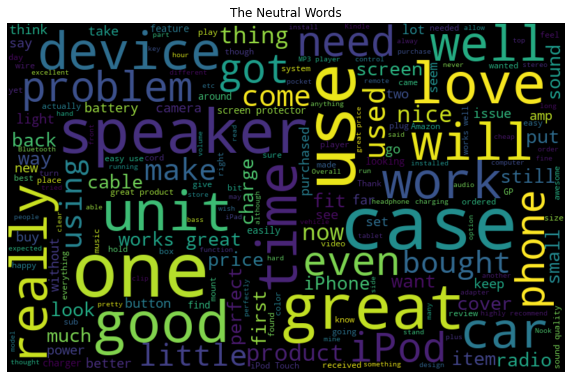

In [73]:
normal_words =' '.join([text for text in X_train['review_body'][X_train['polarity'] == 2]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

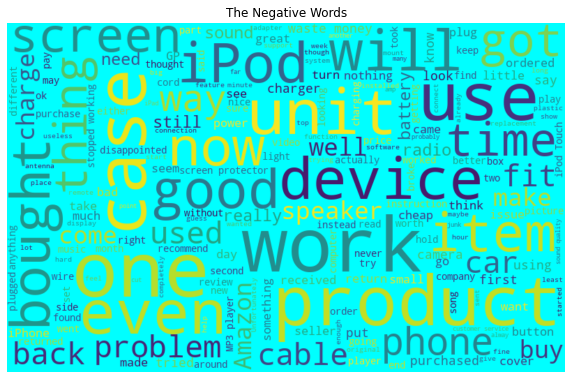

In [74]:
negative_words =' '.join([text for text in X_train['review_body'][X_train['polarity'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [75]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
train_corpus = []

for i in range(0, 39895):
  review = re.sub('[^a-zA-Z]', ' ', X_train['review_body'][i])
  review = review.lower()
  review = review.split()
  
  #ps = PorterStemmer()
  sno = nltk.stem.SnowballStemmer('english')
  
  # stemming
  review = [sno.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [0]:
test_corpus = []

for i in range(0, 9974):
  review = re.sub('[^a-zA-Z]', ' ', X_test['review_body'][i])
  review = review.lower()
  review = review.split()
  
  #ps = PorterStemmer()
  sno = nltk.stem.SnowballStemmer('english')
  
  # stemming
  review = [sno.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
N = 1000

In [79]:
# create tf_idf from train_corpus
cv = CountVectorizer(max_features=N)
wordcount_train = cv.fit_transform(train_corpus)

tfidf_tr=TfidfTransformer(smooth_idf=True,use_idf=True)

x = tfidf_tr.fit_transform(wordcount_train).toarray()
features = cv.get_feature_names()
y = X_train['polarity']

print(x.shape)
print(y.shape)

(39895, 1000)
(39895,)


In [80]:
# create tf_idf from test_corpus
cv = CountVectorizer(max_features=N)
wordcount_test = cv.fit_transform(test_corpus)

tfidf_tr=TfidfTransformer(smooth_idf=True,use_idf=True)

x_test = tfidf_tr.fit_transform(wordcount_test).toarray()
features = cv.get_feature_names()

print(x_test.shape)

(9974, 1000)


In [81]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(29921, 1000)
(9974, 1000)
(29921,)
(9974,)


In [0]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [0]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

In [0]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

In [0]:
# logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)